In [15]:
import pandas as pd #data processing
import numpy as np 
import matplotlib.pyplot as plt
import numpy as np
import os

## Feed Data into SQL and load using DB

In [16]:
df = pd.read_csv("./Resources/diamonds.csv")

In [17]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [18]:
df.columns
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


## Data Cleaning

In [19]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [20]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.drop(columns=['Unnamed: 0'], inplace=True)

## Data Quality check

In [21]:
corr = df.corr()

In [22]:
corr.style.background_gradient(cmap='coolwarm')

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [23]:
df.price = np.log10(df.price)

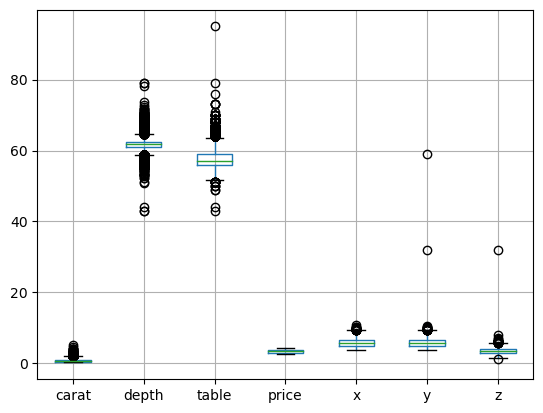

In [24]:
# times = [96,98,100,105,85,88,95,100,101,102,97,98,5]
# fig1, ax1 = plt.subplots()
# ax1.set_title('Reaction Times at Baseball Batting Cage')
# ax1.set_ylabel('Reaction Time (ms)')
# ax1.boxplot(times)
# plt.show()
df.boxplot()
plt.show()

In [25]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3.381587,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,0.440609,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,2.513218,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,2.977266,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,3.380392,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,3.726177,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,4.274689,10.740000,58.900000,31.800000


In [26]:
for col in df.columns:
    if col in ('cut', 'color', 'clarity'):
        continue
    df[col] = df[col] / df[col].max()

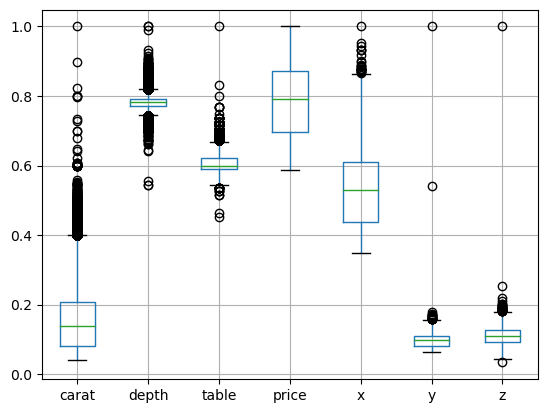

In [27]:
df.boxplot()
plt.show()

In [ ]:
# df.info

## One Label Encoding technique to represent categorical variables as numerical values in a ML model

In [40]:
from sklearn.preprocessing import LabelEncoder

def convert_catg(df):
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    object_cols = list(df.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in object_cols:
        object_cols_ind.append(df.columns.get_loc(col))
        for i in object_cols_ind:
            df.iloc[:,i] = le.fit_transform(df.iloc[:,i])
        

In [60]:
convert_catg(df)
print(df.head())
len(df)

      carat  cut  color  clarity     depth     table     price         x  \
0  0.045908    2      1        3  0.778481  0.578947  0.587930  0.367784   
1  0.041916    3      1        2  0.756962  0.642105  0.587930  0.362197   
2  0.045908    1      1        4  0.720253  0.684211  0.588241  0.377095   
3  0.057884    3      5        5  0.789873  0.610526  0.590393  0.391061   
4  0.061876    1      6        3  0.801266  0.610526  0.590697  0.404097   

          y         z  
0  0.067572  0.076415  
1  0.065195  0.072642  
2  0.069100  0.072642  
3  0.071817  0.082704  
4  0.073854  0.086478  


53920

## Training and Testing

In [50]:
y = df ['price']
y.head()

0    0.587930
1    0.587930
2    0.588241
3    0.590393
4    0.590697
Name: price, dtype: float64

In [51]:
X = df.drop(columns=['price', 'x', 'y', 'z'])
X.head()

,carat,cut,color,clarity,depth,table
0,0.045908,2,1,3,0.778481,0.578947
1,0.041916,3,1,2,0.756962,0.642105
2,0.045908,1,1,4,0.720253,0.684211
3,0.057884,3,5,5,0.789873,0.610526
4,0.061876,1,6,3,0.801266,0.610526


In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,train_size=0.8,random_state=42)

In [69]:
len(X_train)
len(X_test)
len(df)

43136

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform (X_train)
X_test = scaler.fit_transform (X_test)

# Random Forest

In [78]:
# Random Forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200)
# rf = rf.fit(X=df.drop(columns=['price', 'x', 'y', 'z']), y=df.price)
rf.fit(X_train, y_train)
pred2 = rf.predict(X_test)

In [72]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [71]:
rf.feature_importances_

array([0.94220001, 0.0020009 , 0.01504429, 0.03403255, 0.00443865,
       0.00228359])

In [ ]:
##Review feature importances in presentation & use model to predict

In [66]:
# Model output testing
# 1. R2 value
# 2. Q-Q plot
# 3. Residual analysis
# Difference between results

from sklearn.metrics import r2_score

yhat = rf.predict(df.drop(columns=['price', 'x', 'y', 'z']))
print(r2_score(yhat, df.price))

errors = yhat - df.price

# plt.hist(errors, 30, density=True)
# plt.show()


0.9970902596018729


In [46]:
# plt.scatter(y=errors, x=df.price)
# plt.show()